In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../data/processed/retail_clean.csv")

In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-01-12 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-01-12 08:26:00       2.75     17850.0  United Kingdom       22.00  
3  2010-01-12 08:26:00       3.39     17850.0  United Kingdom       20.34  
4  2010-01-12 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [4]:
# Top selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   TotalPrice   401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.6+ MB
None


In [7]:
# change InvoiceDate is datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
df = df.dropna(subset=["InvoiceDate"])

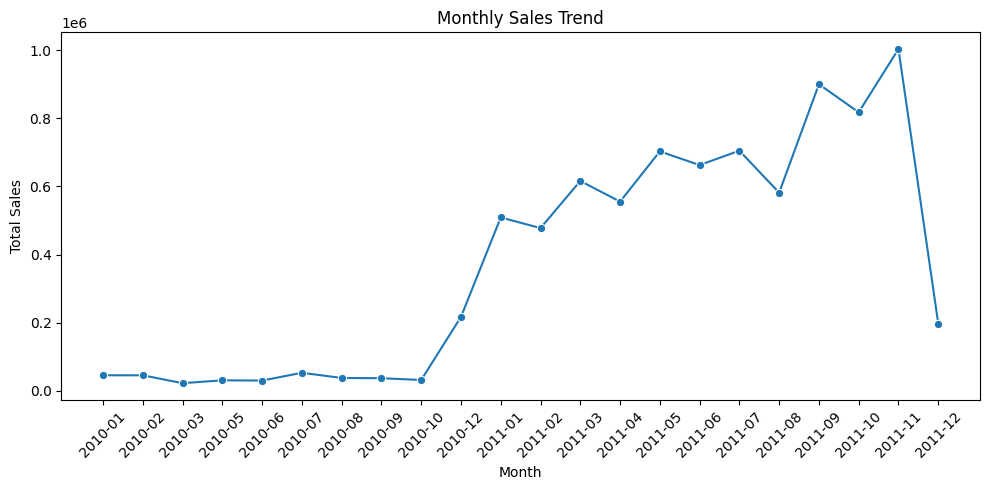

In [10]:
monthly_sales = (
    df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum().reset_index()
)
monthly_sales["InvoiceDate"] = monthly_sales["InvoiceDate"].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="InvoiceDate", y="TotalPrice", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

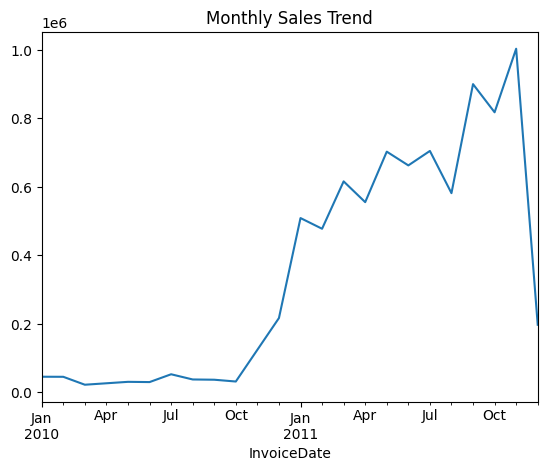

In [11]:
df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum().plot(kind="line")
plt.title("Monthly Sales Trend")
plt.show()